<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [69]:
# Importing the holy trinity of data science.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

df = pd.read_csv('coffee.csv',sep=',')

In [55]:
df.keys()

Index(['What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home?',
       'How do you brew coffee at home? (Pour over)',
       ...
       'Approximately how much have you spent on coffee equipment in the past 5 years?',
       'Do you feel like you’re getting good value for your money with regards to your coffee equipment?',
       'Gender', 'Gender (please specify)', 'Education Level',
       'Ethnicity/Race', 'Ethnicity/Race (please specify)',
       'Employment Status', 'Number of Children', 'Political Affiliation'],
      dtype='object', length=112)

In [56]:
len(df)

4042

In [57]:
print(df.shape)

(4042, 112)


In [70]:
df.dropna(subset=["What is your age?"], inplace=True)
df.dropna(subset=["How do you brew coffee at home?"], inplace=True)
df.dropna(subset=["How many cups of coffee do you typically drink per day?"], inplace=True)

In [46]:
len(df)

3608

In [59]:
df["What is your age?"].unique()

array(['<18 years old', '25-34 years old', '18-24 years old',
       '45-54 years old', '35-44 years old', '>65 years old',
       '55-64 years old'], dtype=object)

C:\Users\cjecc\AppData\Local\Temp\ipykernel_14712\3268378273.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brewTypeByAge = df.groupby('What is your age?')[brewing_columns].sum()


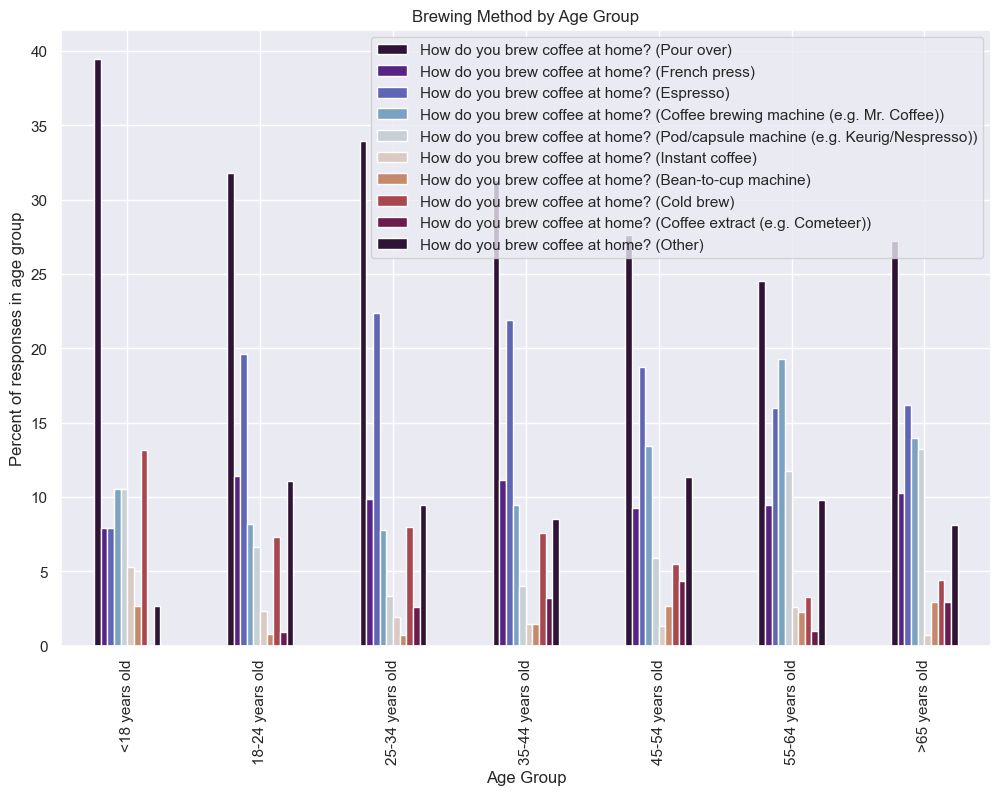

In [96]:
brewing_columns = ['How do you brew coffee at home? (Pour over)',
    'How do you brew coffee at home? (French press)',
    'How do you brew coffee at home? (Espresso)',
    'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
    'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
    'How do you brew coffee at home? (Instant coffee)',
    'How do you brew coffee at home? (Bean-to-cup machine)',
    'How do you brew coffee at home? (Cold brew)',
    'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
    'How do you brew coffee at home? (Other)']

age_order = ['<18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '>65 years old']

df['What is your age?'] = pd.Categorical(df['What is your age?'], categories=age_order, ordered=True)

brewTypeByAge = df.groupby('What is your age?')[brewing_columns].sum()

brewTypeByAgePercentage = brewTypeByAge.divide(brewTypeByAge.sum(axis=1), axis=0) *100

ax = brewTypeByAgePercentage.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='twilight_shifted')
plt.xlabel('Age Group')
plt.ylabel('Percent of responses in age group')
plt.title('Brewing Method by Age Group')

plt.show()


In [89]:
df["How do you brew coffee at home?"].describe()

count          3608
unique          445
top       Pour over
freq            564
Name: How do you brew coffee at home?, dtype: object

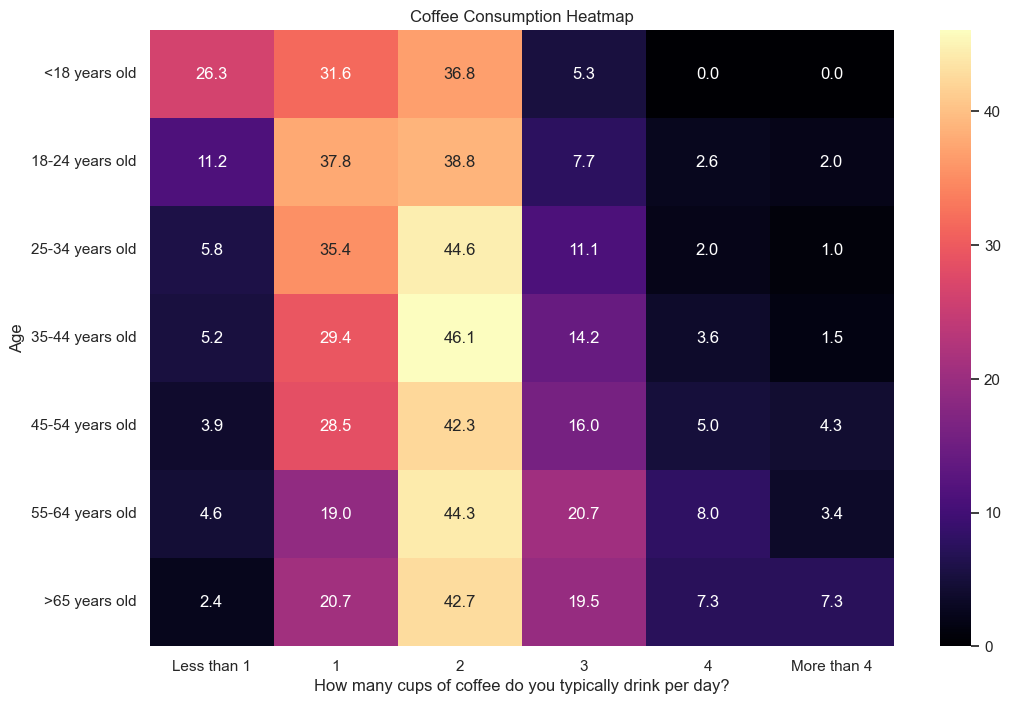

In [82]:
row_order = ['<18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '>65 years old']
column_order = ["Less than 1", "1", "2", "3", "4", "More than 4"]

heatmap_data = df.pivot_table(
    index='What is your age?',
    columns='How many cups of coffee do you typically drink per day?',
    values='Submission ID',
    aggfunc='count',
    fill_value=0
).loc[row_order, column_order]

row_percentages = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(row_percentages, annot=True, fmt='.1f', cmap='magma', cbar=True)

# Add labels and title
plt.xlabel('How many cups of coffee do you typically drink per day?')
plt.ylabel('Age')
plt.title('Coffee Consumption Heatmap')

# Show the plot
plt.show()

In [90]:
df["How many cups of coffee do you typically drink per day?"].describe()

count     3608
unique       6
top          2
freq      1589
Name: How many cups of coffee do you typically drink per day?, dtype: object

C:\Users\cjecc\AppData\Local\Temp\ipykernel_14712\600710418.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  locByAge = df.groupby('What is your age?')[location_columns].sum()


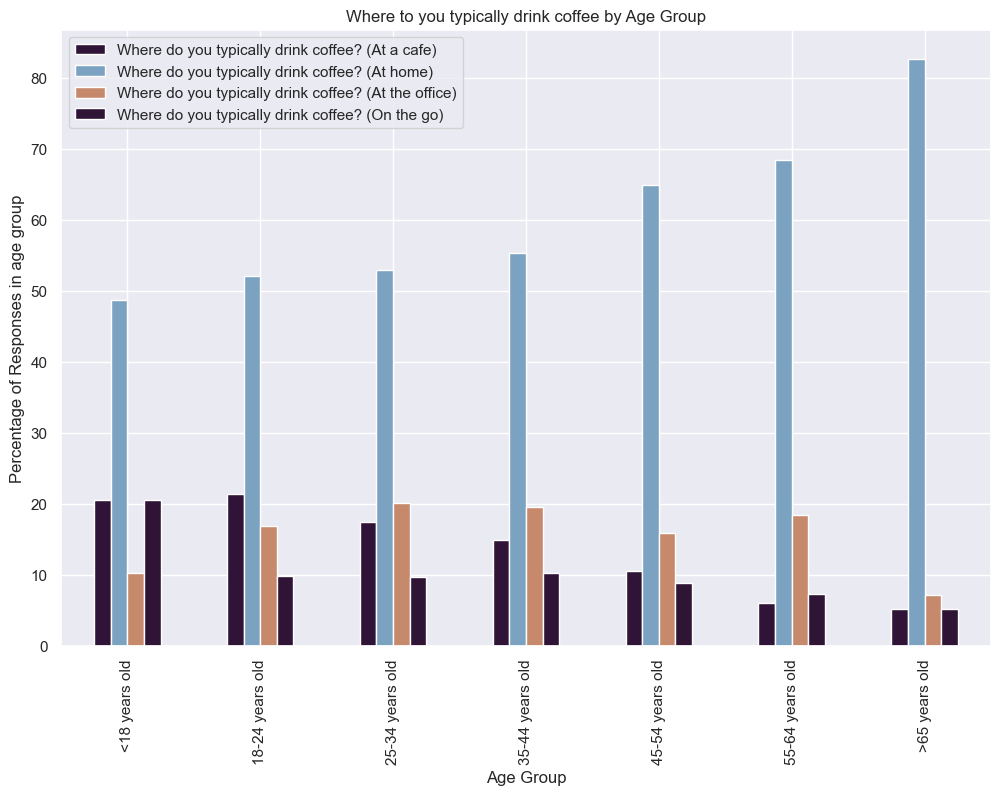

In [105]:
location_columns = ["Where do you typically drink coffee? (At a cafe)",
    "Where do you typically drink coffee? (At home)",
    "Where do you typically drink coffee? (At the office)",
    "Where do you typically drink coffee? (On the go)"]

locByAge = df.groupby('What is your age?')[location_columns].sum()

locByAgePercentage = locByAge.divide(locByAge.sum(axis=1), axis=0) * 100

ax = locByAgePercentage.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='twilight_shifted')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Responses in age group')
plt.title('Where to you typically drink coffee by Age Group')

plt.show()